### ETAPA 1: PREPROCESAMIENTO DE DATO DE INMIGRACIÓN
Análisis inicial sobre datos demográficos de inmigrantes internacionales en España para los años 2008 - 2021 (*24287.csv*) y 2021-2022 (*61623.csv*).

*Fuente: Instituto Nacional de Estadística (INE) de España, https://www.ine.es/dynt3/inebase/index.htm?padre=3694&capsel=1963*

In [1]:
# Dependencias básicas
import pandas as pd
import numpy as np

# Dependencias de visualización
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt

#### *Carga de Datos y Vista Inicial*

In [2]:
# Lectura y visualización de dataset "24287" 
df_0821 = pd.read_csv(
    "../1 - Inmigrantes/Datos Nacionales/24287.csv",
    encoding = "utf-8",
    delimiter = ";",
    decimal = ",",
    thousands = "."
)

df_2122 = pd.read_csv(
    "../1 - Inmigrantes/Datos Nacionales/61623.csv",
    encoding = "utf-8",
    delimiter = ";",
    decimal = ",",
    thousands = "."
)

df_0821.info()
df_0821

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59640 entries, 0 to 59639
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  59640 non-null  object 
 1   Nationality          59640 non-null  object 
 2   Five-year age group  59640 non-null  object 
 3   Periodo              59640 non-null  int64  
 4   Total                55563 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


,Sex,Nationality,Five-year age group,Periodo,Total
0,Both sexes,Total,Total,2021,528856.0
1,Both sexes,Total,Total,2020,467918.0
2,Both sexes,Total,Total,2019,750480.0
3,Both sexes,Total,Total,2018,643684.0
4,Both sexes,Total,Total,2017,532132.0
...,...,...,...,...,...
59635,Females,Stateless persons,90 years old and over,2012,NaN
59636,Females,Stateless persons,90 years old and over,2011,NaN
59637,Females,Stateless persons,90 years old and over,2010,NaN
59638,Females,Stateless persons,90 years old and over,2009,NaN


In [3]:
df_2122.info()
df_2122

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9936 entries, 0 to 9935
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   País de nacimiento  9936 non-null   object
 1   Nacionalidad        9936 non-null   object
 2   Edad                9936 non-null   object
 3   Sexo                9936 non-null   object
 4   Periodo             9936 non-null   int64 
 5   Total               9936 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 465.9+ KB


,País de nacimiento,Nacionalidad,Edad,Sexo,Periodo,Total
0,Total,Total,Total,Ambos Sexos,2022,1258894
1,Total,Total,Total,Ambos Sexos,2021,887960
2,Total,Total,Total,Hombre,2022,626804
3,Total,Total,Total,Hombre,2021,467162
4,Total,Total,Total,Mujer,2022,632090
...,...,...,...,...,...,...
9931,Extranjero,Apátridas,De 65 y más años,Ambos Sexos,2021,9
9932,Extranjero,Apátridas,De 65 y más años,Hombre,2022,3
9933,Extranjero,Apátridas,De 65 y más años,Hombre,2021,3
9934,Extranjero,Apátridas,De 65 y más años,Mujer,2022,4


*Observaciones:*
- Tenemos datos nulos en el número de inmigrantes en el conjunto de datos de los años 2008-2021, pero estos se corresponden a "cero inmigrantes". Y vemos también que importó como *float*, aunque sabemos que son valores enteros, ya que representan a cantidad de personas.
- Los formatos cambian entre ambos dataset, especialmente en relación al idioma.
- En ambos datasets tenemos la información del 2021.

Para abordar las observaciones, remplazaremos los datos nulos por "0" en *df_0821* y cambiaremos el tipo de dato a "int". Luego, filtraremos solo nuestros datos de interés de *df_2122* y estandarizaremos el nombre de nuestra variables en ambos conjuntos de datos.

In [4]:
# Reemplazar de valores nulos de cantidad inmigrantes por 0
df_0821.Total.replace(np.nan, 0, inplace = True)

# Conversión de float a integer al ser datos de cuenta de inmigrantes
df_0821.Total = df_0821.Total.astype(int)

# Filtrar y eliminar la variable "País de nacimiento" de df_2122
df_2122 = df_2122[df_2122["País de nacimiento"] == "Total"]
df_2122.drop("País de nacimiento", axis = 1, inplace = True)

# Crear df con solo datos del año 2022
df_22 = df_2122.loc[df_2122['Periodo'] == 2022,:]

# Renombrar columnas
df_0821 = df_0821.rename(columns={'Five-year age group':'Age group', 
                                  'Periodo':'Year', 
                                  'Total':'Immigrant count'})

df_22 = df_22.rename(columns={'Sexo':'Sex', 'Nacionalidad':'Nationality', 
                              'Edad':'Age group', 'Periodo':'Year', 
                              'Total':'Immigrant count'})

# Reordenar y alinear las columnas de ambos datasets
df_0821 = df_0821[["Year", "Nationality", "Sex", "Age group", "Immigrant count"]]
df_22 = df_22[["Year", "Nationality", "Sex", "Age group", "Immigrant count"]]

C:\temp\ipykernel_11976\2364009021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2122.drop("País de nacimiento", axis = 1, inplace = True)


In [5]:
# Verificar cambios
df_0821.info()
df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59640 entries, 0 to 59639
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             59640 non-null  int64 
 1   Nationality      59640 non-null  object
 2   Sex              59640 non-null  object
 3   Age group        59640 non-null  object
 4   Immigrant count  59640 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1656 entries, 0 to 3310
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1656 non-null   int64 
 1   Nationality      1656 non-null   object
 2   Sex              1656 non-null   object
 3   Age group        1656 non-null   object
 4   Immigrant count  1656 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 77.6+ KB


#### *Evaluar Variables Categóricas*

Ahora estudiaremos las categorías/grupos que toman nuestras variables "Sex", "Nationality" y "Age group" para observar la presencia errores y también evaluar la cantidad de valores que toma cada una.

In [6]:
# Seleccionar variables categóricas en ambos datasets
categoricas_0821 = df_0821.select_dtypes(include = ['object'])
categoricas_22 = df_22.select_dtypes(include = ['object'])

# Mostrar valores únicos por variable categórica
print ('------------------------- \033[1m DATOS 2008 - 2021 \033[0m ---------------------------\n')
for col in categoricas_0821:
    print(f"\033[1m {col}:\033[0m", len(df_0821[col].unique()), "valores \n \n", df_0821[col].unique(), "\n")
    
print ('----------------------------- \033[1m DATOS 2022 \033[0m ------------------------------- \n')
for col in categoricas_22:
    print(f"\033[1m {col}:\033[0m", len(df_22[col].unique()), "valores \n \n", df_22[col].unique(), "\n")

-------------------------  DATOS 2008 - 2021  ---------------------------

 Nationality: 71 valores 
 
 ['Total' 'Spanish ' 'País de la UE27_2020 sin España'
 'País de la UE28 sin España' 'Belgium' 'Bulgaria' 'Denmark' 'Finland'
 'France' 'Ireland' 'Italy' 'Netherlands' 'Poland' 'Portugal' 'Germany'
 'Romania' 'Sweden' 'Lithuania' 'Other countries of the European Union'
 'País de Europa menos UE27_2020' 'United Kingdom'
 'País de Europa menos UE28' 'Norway' 'Switzerland' 'Ukraine' 'Moldova'
 'Russia' 'Other European Union countries' 'De Africa' 'Algeria'
 'The Gambia' 'GHANA' 'Guinea' 'Equatorial Guinea' 'Mali' 'Morocco'
 'Mauritania' 'Nigeria' 'Senegal' 'Other African countries'
 'De América del Norte' 'United States of America' 'Mexico' 'Canada'
 'De Centro América y Caribe' 'Cuba' 'Honduras' 'Nicaragua'
 'Dominican Republic' 'Other Central American and Caribbean countries'
 'De Sudamérica' 'Argentina' 'Bolivia' 'Brazil' 'Colombia' 'Chile'
 'Ecuador' 'Paraguay' 'Peru' 'Uruguay' 'Vene

*Observaciones:*
- Notamos nuevamente la diferencia entre los datasets en relación al idioma y los valores que toman las tres variables.
- Hay una cantidad muy grande de nacionalidades, y también observamos agrupaciones de regiones/continentes como: "UE27_2020 sin España", "Otro país de Asia", "America del Norte", entre otros.
- Los grupos de edades son diferentes entre los datasets, en el primero (*df_0821*) hay rangos de edades que aumentan intervalos de cinco años ("From 0 to 4 years old", "From 5 to 9 years", ...), mientras que en el segundo (*df_22*) los rangos son más amplios ("De 0 a 15 años", "De 16 a 24 años", ...). También observamos que algunas de las categorías del 2008-2021 tienen espacios en blanco.

Para abordar estas observaciones, alineremos los grupos de edades entre los datasets y la nomenclatura de dichos grupos; también lo haremos con la variable "Sex". Además, estudiaremos las nacionalidades más representativas de cada año para acotar nuestros datos en torno a las top nacionalidades de inmigrantes y eliminaresmos aquellas que representan regiones/continentes.

#### *Estandarización de Categorías para "Age group" y "Sex"*

Debido a que hay una inconsistencia en el punto de corte de los grupos de edades de ambos datasets en 14 vs 15 años para los grupos de menor edad, y ya que en la página oficial del INE no se aportan detalles adicionales, se consideró un error de formato y se unificaron los grupos con corte en 14 años según el dataset *df_0821*.

In [7]:
# Estandarización de valores para mapeo posterior
mapeo_0821 = {
    "Total": "All",
    "From 0 to 4 years old": "0 - 14",
    "From 5 to 9 years": "0 - 14",
    "From 10 to 14 years": "0 - 14",
    "From 15 to 19 years": "15 - 24",
    "From 20 to 24 years": "15 - 24",
    "From 25 to 29 years": "25 - 34",
    "From 30 to 34 years old": "25 - 34",
    "From 35 to 39 years old": "35 - 44",
    "From 40 to 44 years": "35 - 44",
    "From 45 to 49 years old": "45 - 54",
    "From 50 to 54 years old": "45 - 54",
    "From 55 to 59 years old": "55 - 64",
    "From 60 to 64 years old": "55 - 64",
    "From 65 to 69 years old": "65+",
    "From 70 to 74 years": "65+",
    "From 75 to 79 years": "65+",
    "From 80 to 84 years": "65+",
    "From 85 to 89 years": "65+",
    "90 years old and over": "65+"
}

mapeo_22 = {
    "Total": "All",
    "De 0 a 15 años": "0 - 14", 
    "De 16 a 24 años": "15 - 24",
    "De 25 a 34 años": "25 - 34", 
    "De 35 a 44 años": "35 - 44",
    "De 45 a 54 años": "45 - 54",
    "De 55 a 64 años": "55 - 64",
    "De 65 y más años": "65+"
}

In [8]:
# Mapeo de grupos de edad
df_0821['Age group'] = df_0821['Age group'].str.strip()
df_0821['Age group'] = df_0821['Age group'].map(mapeo_0821)

df_22['Age group'] = df_22['Age group'].map(mapeo_22)

# Verificar cambio
print('\033[1m------------------------- Variable "Age group" -------------------------\033[0m \n')

print(f"\033[1m DATOS 2008 - 2021:\033[0m", 
      len(df_0821['Age group'].unique()), "grupos \n \n", 
      df_0821['Age group'].unique(), "\n")

print(f"\033[1m DATOS 2022:\033[0m", 
      len(df_22['Age group'].unique()), "grupos \n \n", 
      df_22['Age group'].unique(), "\n")

------------------------- Variable "Age group" ------------------------- 

 DATOS 2008 - 2021: 8 grupos 
 
 ['All' '0 - 14' '15 - 24' '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65+'] 

 DATOS 2022: 8 grupos 
 
 ['All' '0 - 14' '15 - 24' '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65+'] 



Luego, realizamos una agrupación y sumatoria de inmigrantes según las nuevas categorías.

In [9]:
# Crear dataframe 2008-2021 de inmigrantes agrupados según las nuevas categorías de edades
grouped_0821 = (
    df_0821.groupby(['Year', 'Nationality', 'Sex', 'Age group'])['Immigrant count']
    .sum()
    .reset_index()
)

grouped_0821

,Year,Nationality,Sex,Age group,Immigrant count
0,2008,Algeria,Both sexes,0 - 14,759
1,2008,Algeria,Both sexes,15 - 24,1166
2,2008,Algeria,Both sexes,25 - 34,2151
3,2008,Algeria,Both sexes,35 - 44,888
4,2008,Algeria,Both sexes,45 - 54,313
...,...,...,...,...,...
23851,2021,Venezuela,Males,35 - 44,1866
23852,2021,Venezuela,Males,45 - 54,926
23853,2021,Venezuela,Males,55 - 64,647
23854,2021,Venezuela,Males,65+,587


In [10]:
# Comprobación de sumas
sum(df_0821['Immigrant count']) - sum(grouped_0821['Immigrant count'])

0

Ahora estandarizamos las categorías de sexo:

In [11]:
# Estandarizar categorías de la variable "Sex"
grouped_0821['Sex'] = grouped_0821['Sex'].map({'Both sexes':'Both', 'Males': 'Males', 'Females': 'Females'})

df_22['Sex'] = df_22['Sex'].map({'Ambos Sexos' : 'Both', 'Hombre': 'Males', 'Mujer': 'Females'})

# Verificar cambio
print('\033[1m------- Variable "Sex" -------\033[0m \n')

print(f"\033[1m Datos 2008 - 2021:\033[0m", 
      len(grouped_0821['Sex'].unique()), "valores \n \n", 
      grouped_0821['Sex'].unique(), "\n")

print(f"\033[1m Datos 2022:\033[0m", 
      len(df_22['Sex'].unique()), "categorías \n \n", 
      df_22['Sex'].unique(), "\n")

------- Variable "Sex" ------- 

 Datos 2008 - 2021: 3 valores 
 
 ['Both' 'Females' 'Males'] 

 Datos 2022: 3 categorías 
 
 ['Both' 'Males' 'Females'] 



#### *Análisis Exploratorio de Inmigración Total*

Antes de continuar con el análisis de las nacionalidades, observemos brevemente el comportamiento global de los datos de inmigración.

In [12]:
# Concatenar conteo de inmigrantes totales de ambos datasets
totales_0821 = grouped_0821[grouped_0821["Nationality"] == "Total"]
totales_22 = df_22[df_22["Nationality"] == "Total"]
totales = pd.concat([totales_0821, totales_22], axis = 0, ignore_index = True)

# Graficar la cantidad total de inmigrantes en el tiempo
alt.Chart(totales[(totales["Sex"] == "Both") & (totales["Age group"] == "All")], height = 300, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y ="Immigrant count",
                    tooltip=["Year","Immigrant count"])\
            .properties(title="Total de Inmigrantes desde 2008 a 2022")

alt.Chart(...)

In [13]:
# Agrupar y obtener conteo total por categorías de edad/sexo
totales_cat = totales[(totales["Sex"] != "Both") & (totales["Age group"] != "All")].groupby(["Sex", "Age group"])["Immigrant count"].sum().to_frame().reset_index()

# Cantidad total de inmigrantes por grupo de edad/sexo
alt.Chart(totales_cat, height = 300, width = 400)\
            .mark_bar()\
            .encode(x=alt.X('Age group', axis=alt.Axis(labelAngle=-360)),
                    y="Immigrant count",
                    color = alt.Color('Sex',scale=alt.Scale(scheme="set1")),
                    tooltip=["Sex", "Immigrant count"])\
            .properties(title="Total de Inmigrantes por Grupo de Edad/Sexo")

alt.Chart(...)

*Observaciones:*
- Entre 2008-2013 hay una caida de número de inmigrantes y a partir del 2014 aumenta progresivamente hasta alcanzar un pico de 750,480 imigrantes en 2019, para luego disminuir en el 2020 y 2021 (período de pandemia y restricciones sanitarias relacionadas al COVID 19) y mostrar un gran salto hasta ≈1.25 millones de inmigrantes en el 2022 (post-pandemia), superando al 2019 en aproximadamente 500,000 inmigrantes.
- Observando los inmigrantes que llegaron a España durante estos 15 años según la edad, vemos que predomina la inmigración de personas jóvenes de entre 25-34 años, seguidos de jóvenes de entre 15-24. A partir de ese punto, es notable la disminución progresiva del número de inmigrantes con el incremento de la edad.
- En cuanto al sexo, vemos que la cantidad de mujeres y hombres es similar en todos los grupos, especialmente en los grupos de mayor presencia (15-24 y 25-34 años). Únicamente los grupos de entre 0-14 y 55-64 años muestran una mayor diferencia, el primero hacia los hombres y el segundo hacia las mujeres.


Antes de continuar con la exploración de los datos, continuemos con el trabajo de pre-procesamiento y estandarización de las nacionalidades.

#### *Análisis de Nacionalidades más Importantes*

En primer lugar, removeremos las categorías de nacionalidades que hacen referencia a regiones, continentes u otros para quedarnos únicamente con las asociadas a países.

In [14]:
# Identificación de grupos de países u otros para ambos datasets
grupos_0821 = [
    "De Africa",
    "De América del Norte",
    "De Asia",
    "De Centro América y Caribe",
    "De Oceanía",
    "De Sudamérica",
    "Other African countries",
    "Other Asian countries",
    "Other Central American and Caribbean countries",
    "Other countries of the European Union",
    "Other European Union countries",
    "Other South American countries",
    "País de Europa menos UE27_2020",
    "País de Europa menos UE28",
    "País de la UE27_2020 sin España",
    "País de la UE28 sin España",
    "Stateless persons",
    "Total"
]

grupos_22 = [
    'América del Norte',
    'Apátridas',
    'De Africa',
    'De Asia',
    'De Centro América y Caribe',
    'De Oceanía',
    'De Sudamérica',
    'Europa menos UE27_2020',
    'Otro país de África',
    'Otro país de Asia',
    'Otro país de Centro América y Caribe',
    'Otro país de la Unión Europea sin España',
    'Otro país de Sudamérica',
    'Otro país del resto de Europa',
    'Total',
    'UE27_2020 sin España'
] 


In [15]:
# Filtrar para remover regiones, grupos u otros de la variable "Nationality" 
grouped_0821 = grouped_0821[~grouped_0821['Nationality'].isin(grupos_0821)]
df_22 = df_22[~df_22['Nationality'].isin(grupos_22)]

# Verificar nacionalidades
print ('------------------------- \033[1m DATOS 2008 - 2021 \033[0m ---------------------------\n')
print(f"\033[1m Nacionalidades:\033[0m", 
      len(grouped_0821['Nationality'].unique()),"\n \n", 
      grouped_0821['Nationality'].unique(), "\n")
    
print ('----------------------------- \033[1m DATOS 2022 \033[0m ------------------------------- \n')
print("\033[1m Nacionalidades:\033[0m", 
      len(df_22['Nationality'].unique()),"\n \n", 
      df_22['Nationality'].unique())

-------------------------  DATOS 2008 - 2021  ---------------------------

 Nacionalidades: 53 
 
 ['Algeria' 'Argentina' 'Bangladesh' 'Belgium' 'Bolivia' 'Brazil'
 'Bulgaria' 'Canada' 'Chile' 'China' 'Colombia' 'Cuba' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Equatorial Guinea' 'Finland' 'France'
 'GHANA' 'Germany' 'Guinea' 'Honduras' 'India' 'Ireland' 'Italy'
 'Lithuania' 'Mali' 'Mauritania' 'Mexico' 'Moldova' 'Morocco'
 'Netherlands' 'Nicaragua' 'Nigeria' 'Norway' 'Pakistan' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Senegal' 'Spanish '
 'Sweden' 'Switzerland' 'The Gambia' 'Ukraine' 'United Kingdom'
 'United States of America' 'Uruguay' 'Venezuela'] 

-----------------------------  DATOS 2022  ------------------------------- 

 Nacionalidades: 53 
 
 ['Española' 'Bélgica' 'Bulgaria' 'Dinamarca' 'Finlandia' 'Francia'
 'Irlanda' 'Italia' 'Países Bajos' 'Polonia' 'Portugal' 'Alemania'
 'Rumanía' 'Suecia' 'Lituania' 'Noruega' 'Reino Unido' 'Suiza' 'Ucrania

Habiendo removido las categorías que representan diversas agrupaciones, veamos vizualmente la distribución de los totales de las nacionalidades por años.

In [16]:
# Filtrar datos para obtener el total de inmigrantes por nacionalidad en cada año
boxplot_0821 = grouped_0821[(grouped_0821["Age group"] == "All") &\
                            (grouped_0821["Sex"] == "Both")]

boxplot_22 = df_22[(df_22["Age group"] == "All") &\
                   (df_22["Sex"] == "Both")]

immi_boxplot = pd.concat([boxplot_0821, boxplot_22], axis = 0, ignore_index = True)

# Generar boxplots de datos de conteo de inmigrantes por año
alt.Chart(immi_boxplot, height = 30, width = 1000).mark_boxplot()\
    .encode(x = alt.X('Immigrant count:Q', title = "Immigrant Count"), row = 'Year:N', tooltip=["Nationality"])\
    .resolve_scale(x = 'shared',color='shared')\
    .properties(title='Distribución de Número de Integrantes Por Año')

alt.Chart(...)

La distribución por año parece ndicar que a medida que hay menor inmigración, la dispersión de los datos es menor y los valores atípicos menos extremos en relación con el rango intercuartílico (caja), mientras que cuando hay aumenta la inmigración en el tiempo, la dispersión también aumenta.

Además, vemos que la mayoría de los datos se concentran en un rango medio/bajo de número de inmigrantes (observar rango intercuartílico entre 2008-2021 que se mantiene alrededor o por debajo de 10,000) y sólo algunas nacionalidades presentan valores "atípicamente" superiores al resto. Y son precisamente estas nacionalidades con grandes valores atípicos los que son de nuestro interés de estudio y modelado, pues en ellas se condensan la mayor masa de inmigrantes hacia España. Más aún, es interesante observar como algunas nacionalidades mantienen un número atípicamente alto de immigración a lo largo de todo el período 2008-2022, como son españoles, colombianos, rumanos y marroquíes.

A partir de esto, necesitamos reducir nuestros datos en torno a las nacionalidades más representativas en cuanto a cantidad de inmigrantes. Para ello, consideraremos las top nacionalidades a aquellas que, en conjunto y de forma decreciente, engloben alrededor del 75% de los inmigrantes en cada año. Y de ser necesario, en futuros pasos reduciremos aún más nuestro número de nacionalidades.

In [17]:
# Lista vacía
top_nacio = []
years = grouped_0821.Year.unique().tolist()

# Bucle para extrater los top países por año en datos de 2008-2021
for year in sorted(years):
               # Filtrar datos, agrupar por nacionalidad, sumar inmigrantes y convertir a dataframe
    sum_year = grouped_0821[(grouped_0821['Year'] == year) &\
                            (grouped_0821['Sex'] == 'Both') &\
                            (grouped_0821['Age group'] == 'All')]\
               .groupby(['Nationality'])\
               ['Immigrant count'].sum().sort_values(ascending = False)\
               .to_frame().reset_index() 
    
    # Obtener porcentaje en relación al total de inmigrantes en el año 
    sum_year['% of total'] = sum_year['Immigrant count'] / sum_year['Immigrant count'].sum() * 100  
    # Obtener suma acumulada de los porcentajes
    sum_year['% acumulado'] = sum_year['% of total'].cumsum()
    # Filtrar top nacionalidades con suma acumulada menor a 76% (punto de corte 75%)
    sum_year = sum_year[sum_year['% acumulado'] <= 76]
    # Crear una lista con las nacionalidades del top
    top = sum_year['Nationality'].tolist()
    # Agregar en lista vacia el top nacionalidades de cada año
    top_nacio = top_nacio + top

top_nacio

['Morocco',
 'Romania',
 'Colombia',
 'Ecuador',
 'Spanish ',
 'Peru',
 'United Kingdom',
 'Brazil',
 'China',
 'Paraguay',
 'Dominican Republic',
 'Italy',
 'Portugal',
 'Argentina',
 'Germany',
 'Bulgaria',
 'Senegal',
 'Romania',
 'Morocco',
 'Spanish ',
 'Colombia',
 'United Kingdom',
 'Peru',
 'Ecuador',
 'China',
 'Italy',
 'Paraguay',
 'Brazil',
 'Dominican Republic',
 'Germany',
 'Portugal',
 'France',
 'Bulgaria',
 'Senegal',
 'Argentina',
 'Romania',
 'Spanish ',
 'Morocco',
 'United Kingdom',
 'Pakistan',
 'Colombia',
 'Italy',
 'China',
 'Paraguay',
 'Brazil',
 'Bulgaria',
 'Germany',
 'Peru',
 'France',
 'Ecuador',
 'Dominican Republic',
 'Venezuela',
 'Russia',
 'Romania',
 'Spanish ',
 'Morocco',
 'United Kingdom',
 'Colombia',
 'Italy',
 'Pakistan',
 'China',
 'Dominican Republic',
 'Bulgaria',
 'Germany',
 'Paraguay',
 'Brazil',
 'France',
 'Peru',
 'Russia',
 'Cuba',
 'Venezuela',
 'Ecuador',
 'Spanish ',
 'Romania',
 'Morocco',
 'United Kingdom',
 'Italy',
 'Dominica

In [18]:
# Lista vacia para valores únicos
top_unicos = []
    
# Recorrer todos los elementos de la lista "top_paises"
for nacionalidad in top_nacio:
        # Revisar si existe en "top_unicos" o no, y agregar a la lista si no está
    if nacionalidad not in top_unicos:
        top_unicos.append(nacionalidad)
            
top_unicos

['Morocco',
 'Romania',
 'Colombia',
 'Ecuador',
 'Spanish ',
 'Peru',
 'United Kingdom',
 'Brazil',
 'China',
 'Paraguay',
 'Dominican Republic',
 'Italy',
 'Portugal',
 'Argentina',
 'Germany',
 'Bulgaria',
 'Senegal',
 'France',
 'Pakistan',
 'Venezuela',
 'Russia',
 'Cuba',
 'Honduras',
 'United States of America',
 'Algeria',
 'Ukraine',
 'Nicaragua']

In [19]:
# Mismo proceso previo, pero para el conjunto de datos del 2022
sum_year = df_22[(df_22['Sex'] == 'Both') &\
                 (df_22['Age group'] == 'All')]\
           .groupby(['Nationality'])\
           ['Immigrant count'].sum().sort_values(ascending = False)\
           .to_frame().reset_index() 

sum_year['% of total'] = sum_year['Immigrant count'] / sum_year['Immigrant count'].sum() * 100  
sum_year['% acumulado'] = sum_year['% of total'].cumsum()
sum_year = sum_year[sum_year['% acumulado'] < 76]
top_22 = sum_year['Nationality'].tolist()

top_22

['Colombia',
 'Española',
 'Marruecos',
 'Ucrania',
 'Venezuela',
 'Perú',
 'Italia',
 'Rumanía',
 'Honduras',
 'Argentina',
 'Paraguay',
 'Rusia',
 'Brasil',
 'Reino Unido']

Ahora, con nuestra lista de top nacionalidades, filtremos nuestros datasets para luego proceder a estandarizarlas y unir ambos conjunto de datos.

*Nota: Para unificar el formato de nacionalidades, usaremos un estándar internacional de tres códigos (ALPHA-3) descrito en la "ISO 3166". Fuente: https://www.iso.org/obp/ui/#search*

In [20]:
# Filtrar ambos datasets con las listas de top nacionalidades
grouped_0821 = grouped_0821[grouped_0821['Nationality'].isin(top_unicos)]
df_22 = df_22[df_22['Nationality'].isin(top_22)]

In [21]:
# Estandarización de valores de nacionalidades para mapeo posterior
cod_0821 = {
    'Morocco': 'MAR',
    'Romania': 'ROU',
    'Colombia': 'COL',
    'Ecuador': 'ECU',
    'Spanish ': 'ESP',
    'Peru': 'PER',
    'United Kingdom': 'GBR',
    'Brazil': 'BRA',
    'China': 'CHN',
    'Paraguay': 'PRY',
    'Dominican Republic': 'DOM',
    'Italy': 'ITA',
    'Portugal': 'PRT',
    'Argentina': 'ARG',
    'Germany': 'DEU',
    'Bulgaria': 'BGR',
    'Senegal': 'SEN',
    'France': 'FRA',
    'Pakistan': 'PAK',
    'Venezuela': 'VEN',
    'Russia': 'RUS',
    'Cuba': 'CUB',
    'Honduras': 'HND',
    'United States of America': 'USA',
    'Algeria': 'DZA',
    'Ukraine': 'UKR',
    'Nicaragua': 'NIC'
}

cod_22 = {
    'Colombia': 'COL',
    'Española': 'ESP',
    'Marruecos': 'MAR',
    'Ucrania': 'UKR',
    'Venezuela': 'VEN',
    'Perú': 'PER',
    'Italia' : 'ITA',
    'Rumanía': 'ROU',
    'Honduras': 'HND',
    'Argentina': 'ARG',
    'Paraguay': 'PRY',
    'Rusia': 'RUS',
    'Brasil': 'BRA',
    'Reino Unido': 'GBR'
}

In [22]:
# Mapeo de grupos de edad
grouped_0821['Nationality code'] = grouped_0821['Nationality'].map(cod_0821)

df_22['Nationality code'] = df_22['Nationality'].map(cod_22)

# Verificar cambio
print('\033[1m-------------------- Variable "Nationality code" ---------------------\033[0m \n')

print(f"\033[1m DATOS 2008 - 2021:\033[0m", 
      len(grouped_0821['Nationality code'].unique()), "grupos \n \n", 
      grouped_0821['Nationality code'].unique(), "\n")

print(f"\033[1m DATOS 2022:\033[0m", 
      len(df_22['Nationality code'].unique()), "grupos \n \n", 
      df_22['Nationality code'].unique(), "\n")

-------------------- Variable "Nationality code" --------------------- 

 DATOS 2008 - 2021: 27 grupos 
 
 ['DZA' 'ARG' 'BRA' 'BGR' 'CHN' 'COL' 'CUB' 'DOM' 'ECU' 'FRA' 'DEU' 'HND'
 'ITA' 'MAR' 'NIC' 'PAK' 'PRY' 'PER' 'PRT' 'ROU' 'RUS' 'SEN' 'ESP' 'UKR'
 'GBR' 'USA' 'VEN'] 

 DATOS 2022: 14 grupos 
 
 ['ESP' 'ITA' 'ROU' 'GBR' 'UKR' 'RUS' 'MAR' 'HND' 'ARG' 'BRA' 'COL' 'PRY'
 'PER' 'VEN'] 



In [23]:
# Remover la columna "Nationality"
grouped_0821 = grouped_0821.drop('Nationality', axis = 1)
df_22 = df_22.drop('Nationality', axis = 1)

# Reordenar las columnas
grouped_0821 = grouped_0821[["Year", "Nationality code", "Sex", "Age group", "Immigrant count"]]
df_22 = df_22[["Year", "Nationality code", "Sex", "Age group", "Immigrant count"]]

In [24]:
grouped_0821.info()
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 0 to 23855
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              9072 non-null   int64 
 1   Nationality code  9072 non-null   object
 2   Sex               9072 non-null   object
 3   Age group         9072 non-null   object
 4   Immigrant count   9072 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 389.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 48 to 2830
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              336 non-null    int64 
 1   Nationality code  336 non-null    object
 2   Sex               336 non-null    object
 3   Age group         336 non-null    object
 4   Immigrant count   336 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [25]:
# Concatenar ambos conjunto de datos
df = pd.concat([grouped_0821.sort_values('Year'), df_22], axis = 0, ignore_index = True)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9408 entries, 0 to 9407
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              9408 non-null   int64 
 1   Nationality code  9408 non-null   object
 2   Sex               9408 non-null   object
 3   Age group         9408 non-null   object
 4   Immigrant count   9408 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 367.6+ KB


,Year,Nationality code,Sex,Age group,Immigrant count
0,2008,DZA,Both,0 - 14,759
1,2008,PER,Males,35 - 44,2938
2,2008,PER,Males,45 - 54,1128
3,2008,PER,Males,55 - 64,265
4,2008,PER,Males,65+,156
...,...,...,...,...,...
9403,2022,VEN,Males,55 - 64,1606
9404,2022,VEN,Females,55 - 64,3913
9405,2022,VEN,Both,65+,4665
9406,2022,VEN,Males,65+,1407


#### *Análisis Exploratorio del Top Nacionalidades*


**Distribución de Número de Inmigrantes por Año**

In [26]:
# Filtrar datos para obtener el total de inmigrantes del top nacionalidadesnacionalidad en cada año
boxplot_df = df[(df["Age group"] == "All") & (df["Sex"] == "Both")]

# Generar boxplots de datos de conteo de inmigrantes por año para el top nacionalidades
alt.Chart(boxplot_df, height = 30, width = 1000).mark_boxplot()\
    .encode(x = alt.X('Immigrant count:Q', title = "Immigrant Count"), row = 'Year:N', tooltip=["Nationality code"])\
    .resolve_scale(x = 'shared',color='shared')\
    .properties(title='Top Nacionalidades: Distribución de Número de Inmigrantes por año')

alt.Chart(...)

Comparando este gráfico de cajas del top 27 de nacionalidades con el inicial que incluía todas, vemos que es más clara la sutil diferencia entre los años, pero seguimos observando gran dispersión, sesgo de hacia la izquierda y la presencia en cada año de entre 3-5 valores/nacionalidades con un número de inmigrantes atípicamente altos. Sin embargo, ahora que nos hemos centrado en el top nacionalidades, el año 2022 se diferencia significativamente del resto al presentar inmigración media/alta.

**Representación Porcentual del Total**

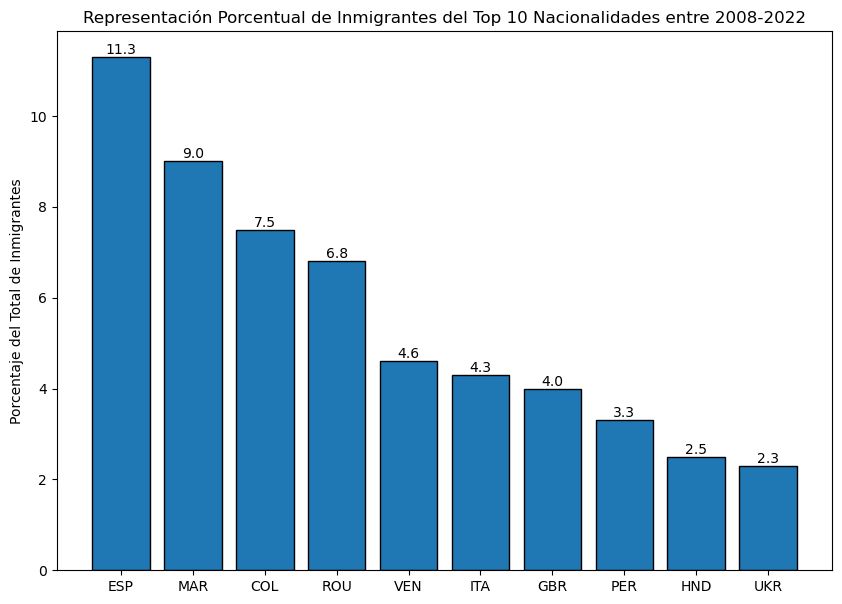

In [27]:
# Total de inmigrantes del top nacionalidades
totales_paises = df[(df["Sex"] == "Both") & (df["Age group"] == "All")].groupby("Nationality code")["Immigrant count"].sum().reset_index()
totales_paises = totales_paises.sort_values("Immigrant count", ascending = False).reset_index(drop = True)

# Calcular porcentaje del top nacionalidades en base al total de inmigrantes del periiodo 2008-2022
total_immi = totales[(totales["Sex"] == "Both") & (totales["Age group"] == "All")]["Immigrant count"].sum()
totales_paises["Immigrant %"] = round(totales_paises["Immigrant count"] / total_immi * 100, 1)

# Graficar representación porcentual del top 10
plt.figure(figsize=(10, 7))
plt.title('Representación Porcentual de Inmigrantes del Top 10 Nacionalidades entre 2008-2022')
plt.ylabel("Porcentaje del Total de Inmigrantes")
barplot_immi = plt.bar(totales_paises['Nationality code'].iloc[:10], totales_paises['Immigrant %'].iloc[:10], ec = "black")
plt.bar_label(barplot_immi, labels = totales_paises['Immigrant %'].iloc[:10], label_type = "edge")
plt.show()

*Observaciones:*
- Previamente, ya habíamos notado la cantidad de inmigrantes españoles, colombianos, marroquíes y rumanos, y ahora lo observamos también en su distribución porcentual en base al total.
- Luego de los top 4, parece variación porcentual menor entre las subsiguientes nacionalidades.

**Top 5 Nacionalidades: Comparación de la Variación del Número de Inmigrantes en el Tiempo** 

In [29]:
top5 = ['ESP', 'MAR', 'COL', 'ROU', 'VEN']
df_top5 = df[(df["Sex"] == "Both") & (df["Age group"] == "All")]
df_top5 = df_top5[(df_top5["Nationality code"].isin(top5))]

# Graficar cambio de estadísticos en el tiempo
alt.Chart(df_top5, height = 450, width = 750)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = 'Immigrant count',
                    color = 'Nationality code',
                    tooltip =["Year", "Nationality code", 'Immigrant count'])\
            .properties(title="Top 5 Nacionalidades: Cambio en el Tiempo del Número de Inmigrantes")


alt.Chart(...)

Observamos que, previo a la pandemia (2008-2019), las distintas nacionalidades en el top 5 presentan presentan diferencias notables. Por ejemplo, los inmigrantes colombianos y venezolanos entán en un rango medio/bajo durante 2008-2015, pero a partir del 2016 su número comienza a aumentar drásticamente. Incluso podemos ver como los colombianos se convierten en la nacionalidad con el mayor número de inmigrantes en el 2022 (post-pandemia). 

Así mismo, vemos como los rumanos presentan un descenso a partir del 2012 y el número de inmigrantes se estabiliza. Por otro lado, en cuento a crecimiento, el incremento de españoles es similar a venezolanos y marroquies a partir del 2012, pero vemos que su número incrementa a un ritmo diferente.

Estos datos indican que las condiciones específicas de cada nación, o nación de origen, del inmigrante tiene un efecto importante a tener en cuenta.

**Número de Inmigrantes Según Sexo a lo largo del Tiempo**

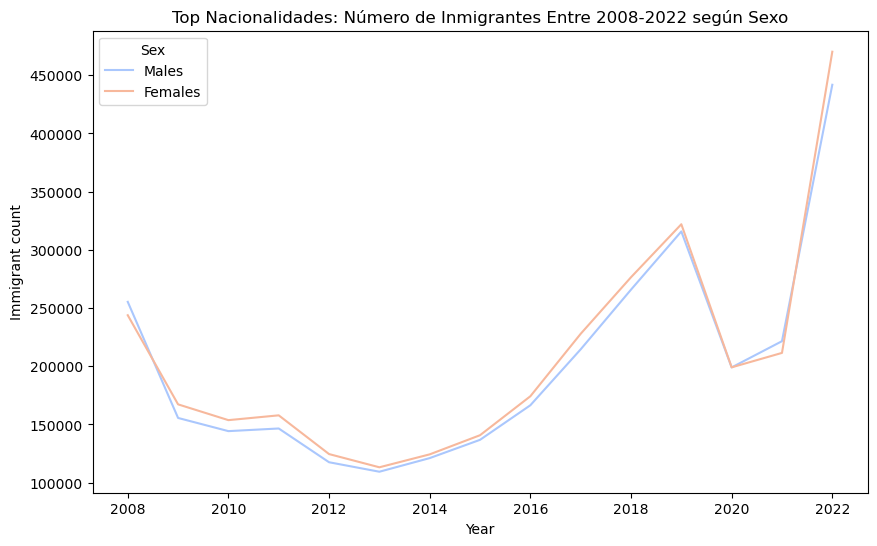

In [30]:
# Filrar, agrupar por año/sexo y obtener suma total
data_por_sexo = df[(df['Sex'] != 'Both') & (df["Age group"] != "All")].groupby(['Year', 'Sex'])['Immigrant count'].sum().reset_index()

# Graficar cantidad de inmigrantes hombres y mujeres desde 2008 hasta 2022
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_por_sexo.sort_values('Sex', ascending = False), x='Year', y='Immigrant count', hue='Sex', palette = "coolwarm")
plt.title('Top Nacionalidades: Número de Inmigrantes Entre 2008-2022 según Sexo')
plt.show()

La cantidad total de inmigrantes hombres y mujeres de nuestras top nacionalidades es muy similar a lo largo de los años, siendo, en la mayoría de los casos, la cantidad de hombres levemente inferior a la de las mujeres (particularmente notable en el intervalo 2009-2011), con excepción de los años 2008 y 2021. 

**Distribución de Inmigrantes por Grupo de Edad según el Año**

In [41]:
# Filtrar, agrupar y sumar inmigrantes según año y grupo de edad
edad_por_año = df[(df['Age group'] != 'All') & (df['Sex'] != 'Both')].groupby(['Year', 'Age group'])['Immigrant count'].sum().reset_index()

# Graficar cantidad total de inmigrantes por grupo de edad en cada año
alt.Chart(edad_por_año, height = 250, width = 270).mark_bar()\
    .encode(
    x= alt.X('Age group:O', axis=alt.Axis(labelAngle=-360)),
    y='Immigrant count:Q',
    color='Age group:N',
    column='Year:N',
    tooltip=["Age group","Immigrant count"])\
    .properties(title="Top Nacionalidades: Número de Inmigrantes por Año según el Grupo de Edad")

alt.Chart(...)

*Observaciones:*

- Entre el 2008-2021, vemos un aumento progresivo de cantidad de inmigrantes hasta los 34 años, siendo el grupo 0-14 años < 15-24 años < 25-34 años. Y a partir de esos grupos, hay una caída progresiva en la cantidad de inmigrantes, similar a lo que observamos previamente en nuestro análisis de sumatoria de totales,siendo la cantidad de inmigrantes del grupo 35-44 años > 45-54 años > 55-64 años > 65+ años.
- Únicamente en el 2022 se observa un cambio en la tendencia, teniendo que  el grupo de 15-24 años presenta una cantidad de inmigrantes menor a la del grupo 0-14 años.
- Los tres grupos de mayor edad (45-54 años, 55-64 años y 65+) que tienen, además, la menor cantidad de inmigrantes, son también los que presentan una menor variación en el número total de inmigrantes a lo largo de los años, contrario a lo que sucede con los grupos con mayor número de inmigrantes.

**Comparación de Algunos Estadísticos Descriptivos entre 2008-2022**

Como nuestros datos son valores totales segregados, nos enfocaremos en analizar el cambio de los valors mínimos, máximos, media y mediana de inmigración en el tiempo.

In [76]:
# Estadísticos descriptivos por año
stats = df[(df["Sex"] == "Both") & (df["Age group"] == "All")].groupby(["Year"])["Immigrant count"].agg([min, max, 'mean', 'median']).reset_index()

# Renombrar columnas
stats.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Media', 'median': 'Mediana'}, inplace = True)

# Convertir columna "Year" en índice
stats.set_index("Year", inplace=True)

# Apilar estadísticos en variable "Stat" y renombrar columnas nuevamente
stats = stats.stack().to_frame().reset_index()
stats.rename(columns={'level_1': 'Stat', 0: 'Valor'}, inplace = True)

# Pasar columna "Valor" a entero
stats.Valor = stats.Valor.astype(int)

# Ver tabla
stats.head(10)

,Year,Stat,Valor
0,2008,Mínimo,2893
1,2008,Máximo,71761
2,2008,Media,18487
3,2008,Mediana,13363
4,2009,Mínimo,2354
5,2009,Máximo,44079
6,2009,Media,11957
7,2009,Mediana,7885
8,2010,Mínimo,2966
9,2010,Máximo,51915


In [107]:
# Graficar cambio de estadísticos en el tiempo
alt.Chart(stats, height = 500, width = 800)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = alt.Y("Valor", title = 'Immigrant count'),
                    color = "Stat",
                    tooltip =["Year", "Stat", "Valor"])\
            .properties(title="Top Nacionalidades: Cambio en el Tiempo de Algunos Estadísticos Descriptivos para el Número de Inmigrantes")

alt.Chart(...)

In [46]:
# Estimar desviación estándar por año
df[(df["Sex"] == "Both") & (df["Age group"] == "All")].groupby(["Year"])["Immigrant count"].agg(['std']).reset_index().astype(int)

,Year,std
0,2008,16629
1,2009,10706
2,2010,10681
3,2011,10591
4,2012,7280
5,2013,6915
6,2014,8640
7,2015,10394
8,2016,12431
9,2017,15982


A través del gráfico, se aprecia que hay una gran distancia entre los valores máximos de cada año en relación al mínimo, media y mediana, reflejándose también de esta forma el sesgo de los datos hacia izquierda. Adicionalmente, notamos que el máximo valor de inmigración también varía más a tarvés de los años que el resto de las medidas. 

Además, si nos fijamos en la evolución de la mediana en nuestras 27 top nacionalidades en relación a la media y máximo, se puede inferir que hay hay un pequeño grupo de nacionalidades que congregan gran cantidad de inmigrantes, y esto lo apreciamos previamente al observar lso gráficos de cajas y como españoles, colombianos, marroquíes y rumanos engloban, en conjunto, un poco más del 30% del total de inmigrantes durante el período 2008-2022. Así, tenemos que, principalmente, el top 5 de nacionalidades de cada año son los responsables de la dispersión de los datos (observar valores de desviación estándar por año, los cuales son cercanos o, en algunos casos, superiores al valor de la media).

Si hacemos el mismo análisis en base al sexo, tendríamos:

In [113]:
# Estadísticos descriptivos por año según el sexo
stats_sex = df[(df["Sex"] != "Both") & (df["Age group"] == "All")].groupby(["Year", "Sex"])["Immigrant count"].agg([min, max, 'mean', 'median']).reset_index()

# Renombrar columnas
stats_sex.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Media', 'median': 'Mediana'}, inplace = True)

# Convertir columna "Year" y "Sex" en índice
stats_sex.set_index(["Year", "Sex"], inplace = True)

# Apilar estadísticos en variable "Stat" y renombrar columnas nuevamente
stats_sex = stats_sex.stack().to_frame().reset_index()
stats_sex.rename(columns={'level_2': 'Stat', 0: 'Valor'}, inplace = True)

# Pasar columna "Valor" a entero
stats_sex.Valor = stats_sex.Valor.astype(int)

# Graficar cambio de estadísticos en el tiempo
alt.Chart(stats_sex, height = 300, width = 600)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = alt.Y("Valor", title = 'Immigrant count'),
                    color = "Stat",
                    column = "Sex",
                    tooltip =["Year", "Stat", "Valor"])\
            .properties(title="Top Nacionalidades: Cambio en el Tiempo de Algunos Estadísticos Descriptivos Según el Sexo")

alt.Chart(...)

En cuanto el sexo, previamente habíamos observado que la tendencia de mujeres y hombres es similar, y ahora lo evidenciamos nuevamente. Los únicos valores que resaltan son la diferencia entre los máximos del 2008, en donde hay una una diferencia de aproximadamente +10,000 inmigrantes hombres en relación a mujeres, y en el 2022 en donde alrededor de +12,000 mujeres en relación a hombres.

Pasando a los grupos de edades:

In [116]:
# Estadísticos descriptivos por año según el grupo de edad
stats_age = df[(df["Sex"] == "Both") & (df["Age group"] != "All")].groupby(["Year", "Age group"])["Immigrant count"].agg([min, max, 'mean', 'median']).reset_index()

# Renombrar columnas
stats_age.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Media', 'median': 'Mediana'}, inplace = True)

# Convertir columna "Year" y "Age group" en índice
stats_age.set_index(["Year", "Age group"], inplace = True)

# Apilar estadísticos en variable "Stat" y renombrar columnas nuevamente
stats_age = stats_age.stack().to_frame().reset_index()
stats_age.rename(columns={'level_2': 'Stat', 0: 'Valor'}, inplace = True)

# Pasar columna "Valor" a entero
stats_age.Valor = stats_age.Valor.astype(int)

# Graficar cambio de estadísticos en el tiempo
alt.Chart(stats_age, height = 250, width = 500)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = alt.Y("Valor", title = 'Immigrant count'),
                    color = "Stat",
                    column = "Age group",
                    tooltip =["Year", "Stat", "Valor"])\
            .properties(title="Top Nacionalidades: Cambio en el Tiempo de Algunos Estadísticos Descriptivos Según el Grupo de Edad")

alt.Chart(...)

En cuanto a los grupos edades, vemos un comportamiento similar de los estadísticos descriptivos al observado previamente. Resalta la cercanía entre el mínimo, media y mediana para los grupos de mayor edad a partir de 35 años y que el cambio de los valores máximos dentro se esos grupos presenta una pendiente más suave que los grupos más jovenes (por debajo de 35 años). 

También observamos que hay mucha similitud entre la mediana y media de los tres grupos más jóvenes (0-14, 15-24 y 25-34). Nuevamente, este es otro indicio del impacto del grupo de valores extremos de un pequeño número de nacionalidades.

### ETAPA 2: PREPROCESAMIENTO DE DATOS PARA LAS VARIABLES EXPLICATIVAS